# 메가커피, 스타벅스 비교분석

## Phase1. EDA
### 1.1 데이터 확인

In [6]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import geopandas as gpd # shp 파일 로드
import contextily as ctx # 서울시 지도 불러올 때

import folium
import folium.plugins as plugins


In [9]:
cd /Users/jade/Desktop/prj/MARKET_ANALYSIS/git

/Users/jade/Desktop/prj/market_analysis/git


In [10]:
df = pd.read_csv('processed/analysis_df.csv')

df.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동코드,행정동명,지번주소,도로명주소,경도,...,7세19세,20세25세,26세30세,31세40세,41세50세,51세60세,61세109세,평당거래금액(만원),상권중심점,상권중심점거리
0,부동산임대김은숙,음식,비알코올,카페,종로구,1111054000,삼청동,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로 122-1,126.98184,...,189,108,143,275,298,333,770,583.0,17,2.03


In [12]:
# df.to_csv('../processed/analysis_df.csv', index=False, encoding='utf-8-sig')

In [13]:
df_mgc = df[df['상호명'].str.contains(r'.*엠지씨커피.*')]
df_mgc = pd.concat([df_mgc, df[df['상호명'].str.contains(r'.*메가MGC.*')]], axis=0)
df_mgc.shape

(760, 35)

In [14]:
df_mgc

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동코드,행정동명,지번주소,도로명주소,경도,...,7세19세,20세25세,26세30세,31세40세,41세50세,51세60세,61세109세,평당거래금액(만원),상권중심점,상권중심점거리
5981,메가엠지씨커피천왕이펜하우스점,음식,비알코올,카페,구로구,1153078000,오류2동,서울특별시 구로구 천왕동 273,서울특별시 구로구 천왕로 29,126.838493,...,4401,2084,2241,4199,5600,5859,10368,131.9,3,4.57
6914,메가엠지씨커피신월,음식,비알코올,카페,양천구,1147058000,신월3동,서울특별시 양천구 신월동 166-3,서울특별시 양천구 남부순환로40길 3,126.828318,...,1048,737,957,1793,1820,2503,4694,103.7,14,2.47
34246,메가엠지씨커피미아,음식,비알코올,카페,강북구,1130554500,송중동,서울특별시 강북구 미아동 72-5,서울특별시 강북구 도봉로10길 38,127.031034,...,2172,1906,1948,3508,3851,4832,8775,292.5,7,1.43
42910,메가엠지씨커피미아현대점,음식,비알코올,카페,성북구,1129068500,길음2동,서울특별시 성북구 길음동 517-15,서울특별시 성북구 동소문로 309,127.028585,...,2822,1499,1242,2899,3768,3630,4496,326.4,7,2.12
49372,메가엠지씨커피군자역점,음식,비알코올,카페,광진구,1121578000,능동,서울특별시 광진구 능동 279-4,서울특별시 광진구 능동로 294,127.079097,...,605,895,1510,2284,1524,1408,2332,262.1,12,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379738,메가MGC커피구로대륭포스트,음식,비알코올,카페,구로구,1153054000,구로3동,서울특별시 구로구 구로동 182-13,서울특별시 구로구 디지털로 306,126.897334,...,1533,1743,2988,4375,3586,3096,5047,186.7,5,0.87
380567,메가MGC커피독산대륭20차점,음식,비알코올,카페,금천구,1154551000,가산동,서울특별시 금천구 가산동 691,서울특별시 금천구 가산디지털1로 5,126.886712,...,703,2317,5651,6285,2771,2714,4312,156.2,5,1.48
401240,메가MGC커피,음식,비알코올,카페,강동구,1174059000,암사3동,서울특별시 강동구 암사동 447-25,서울특별시 강동구 고덕로 95,127.135841,...,2553,946,870,2130,3006,2556,4119,99.1,4,1.40
491341,메가MGC커피회현SK리더스뷰점,음식,비알코올,카페,중구,1114054000,회현동,서울특별시 중구 회현동1가 206,서울특별시 중구 퇴계로 72,126.980601,...,254,196,275,505,501,761,1700,393.3,17,1.33


## Phase2: 지리적 분석

### 2.1 지역별 분포 분석

In [15]:
df_district_gu = df_mgc['시군구명'].value_counts().reset_index()
df_district_gu.columns = ['시군구명', '메가커피_count']
df_district_gu['메가커피_ratio'] = df_district_gu['메가커피_count'] / df_district_gu['메가커피_count'].sum()
df_district_gu['메가커피_ratio'] = round(df_district_gu['메가커피_ratio'] *100, 2)
df_district_gu.sort_values(by='메가커피_ratio', ascending=False, inplace=True)
df_district_gu.reset_index(drop=True, inplace=True)
df_district_gu

,시군구명,메가커피_count,메가커피_ratio
0,강남구,53,6.97
1,영등포구,43,5.66
2,강서구,43,5.66
3,마포구,41,5.39
4,노원구,39,5.13
5,송파구,37,4.87
6,중구,36,4.74
7,서초구,36,4.74
8,구로구,35,4.61
9,성북구,34,4.47


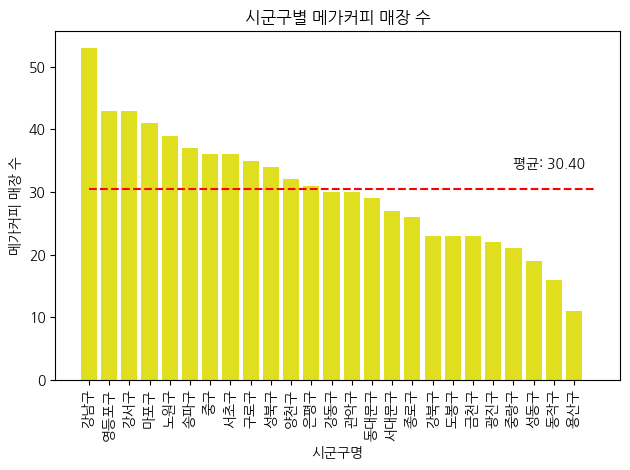

In [16]:
sns.barplot(data=df_district_gu, x='시군구명', y='메가커피_count', color='yellow')
plt.xticks(rotation=90)
plt.hlines(y=df_district_gu['메가커피_count'].mean(), xmin=0, xmax=len(df_district_gu), color='red', linestyle='--')
plt.text(x=21, y=df_district_gu['메가커피_count'].mean()+3, s=f'평균: {df_district_gu["메가커피_count"].mean():.2f}', ha='left', va='bottom')
plt.xlabel('시군구명')
plt.ylabel('메가커피 매장 수')
plt.title('시군구별 메가커피 매장 수')
plt.tight_layout()
plt.show()

In [17]:
df_district_dong = df_mgc['행정동명'].value_counts().reset_index()
df_district_dong.columns = ['행정동명', '메가커피_count']
df_district_dong['메가커피_ratio'] = df_district_dong.iloc[:,1]/641
df_district_dong['메가커피_ratio'] = round(df_district_dong['메가커피_ratio'] *100, 2)
df_district_dong.sort_values(by='메가커피_ratio', ascending=False, inplace=True)
df_district_dong

,행정동명,메가커피_count,메가커피_ratio
0,가산동,11,1.72
2,서교동,10,1.56
1,역삼1동,10,1.56
3,종로1.2.3.4가동,8,1.25
4,명동,7,1.09
...,...,...,...
345,돈암2동,1,0.16
346,증산동,1,0.16
347,반포4동,1,0.16
348,잠실3동,1,0.16


### 2.2 공간적 특성 분석
- 시군구, 행정동별
    - 상권 중심점까지의 거리
    - 근방 지하철역까지의 거리
    - 평당 거래 금액(만원)

In [18]:
# df_mgc.columns
df_mgc[['상권중심점거리','근방지하철역거리','평당거래금액(만원)']].describe()[1:]

,상권중심점거리,근방지하철역거리,평당거래금액(만원)
mean,1.741539,0.633132,276.096579
std,0.829123,0.602250,293.674096
min,0.060000,0.020000,0.300000
25%,1.120000,0.230000,119.125000
50%,1.660000,0.445000,192.000000
75%,2.300000,0.810000,329.125000
max,5.040000,4.590000,2721.500000


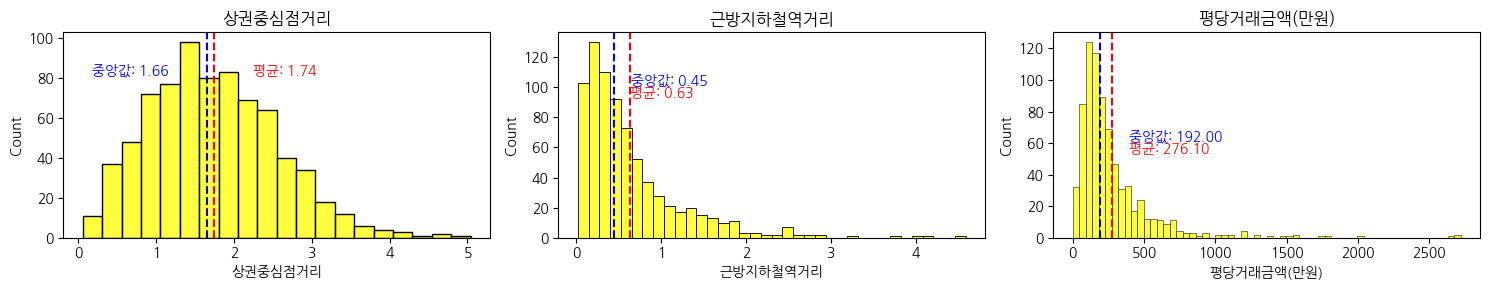

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.histplot(df_mgc['상권중심점거리'], ax=axes[0], color='yellow')
axes[0].set_title('상권중심점거리')
axes[0].axvline(df_mgc['상권중심점거리'].mean(), color='red', linestyle='--')
axes[0].text(x=df_mgc['상권중심점거리'].mean()+0.5, y=80, s=f'평균: {df_mgc["상권중심점거리"].mean():.2f}', ha='left', va='bottom', color='red')
axes[0].axvline(df_mgc['상권중심점거리'].median(), color='blue', linestyle='--')
axes[0].text(x=df_mgc['상권중심점거리'].median()-0.5, y=80, s=f'중앙값: {df_mgc["상권중심점거리"].median():.2f}', ha='right', va='bottom', color='blue')

sns.histplot(df_mgc['근방지하철역거리'], ax=axes[1], color='yellow')
axes[1].set_title('근방지하철역거리')
axes[1].axvline(df_mgc['근방지하철역거리'].mean(), color='red', linestyle='--')
axes[1].text(x=df_mgc['근방지하철역거리'].mean(), y=100, s=f'평균: {df_mgc["근방지하철역거리"].mean():.2f}', ha='left', va='top', color='red')
axes[1].axvline(df_mgc['근방지하철역거리'].median(), color='blue', linestyle='--')
axes[1].text(x=df_mgc['근방지하철역거리'].median()+0.2, y=100, s=f'중앙값: {df_mgc["근방지하철역거리"].median():.2f}', ha='left', va='bottom', color='blue')

sns.histplot(df_mgc['평당거래금액(만원)'], ax=axes[2], color='yellow')
axes[2].set_title('평당거래금액(만원)')
axes[2].axvline(df_mgc['평당거래금액(만원)'].mean(), color='red', linestyle='--')
axes[2].text(x=df_mgc['평당거래금액(만원)'].mean()+120, y=60, s=f'평균: {df_mgc["평당거래금액(만원)"].mean():.2f}', ha='left', va='top', color='red')
axes[2].axvline(df_mgc['평당거래금액(만원)'].median(), color='blue', linestyle='--')
axes[2].text(x=df_mgc['평당거래금액(만원)'].median()+200, y=60, s=f'중앙값: {df_mgc["평당거래금액(만원)"].median():.2f}', ha='left', va='bottom', color='blue')


plt.tight_layout()
plt.show()


In [20]:
df_mgc.groupby('시군구명')[['상권중심점거리','근방지하철역거리','평당거래금액(만원)']].mean().style.background_gradient(cmap='YlOrBr')

,상권중심점거리,근방지하철역거리,평당거래금액(만원)
시군구명,,,
강남구,1.410755,0.566792,552.979245
강동구,1.605667,0.478667,234.163333
강북구,1.486957,0.817391,175.478261
강서구,1.809767,1.097674,263.653488
관악구,1.705667,0.660000,179.033333
광진구,1.568636,0.346364,238.159091
구로구,2.384000,0.951429,154.125714
금천구,1.620435,1.607391,195.804348
노원구,2.118974,0.593846,167.566667


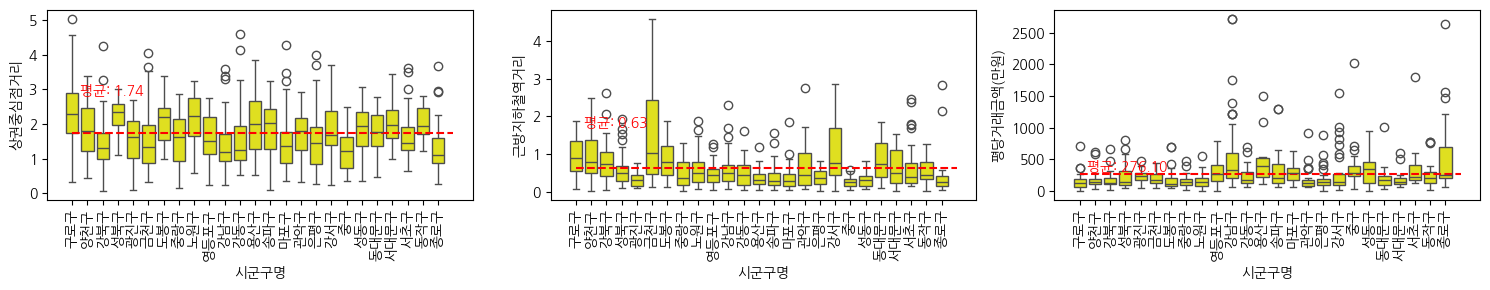

In [21]:
gu_cnt = df_mgc['시군구명'].unique()

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.boxplot(data=df_mgc, x='시군구명', y='상권중심점거리', ax=axes[0], color='yellow')
axes[0].hlines(y=df_mgc['상권중심점거리'].mean(), xmin=0, xmax=df_mgc['시군구명'].nunique(), color='red', linestyle='--')
axes[0].set_xticks(gu_cnt)
axes[0].set_xticklabels(gu_cnt, rotation=90)
axes[0].text(x=0.5, y=df_mgc['상권중심점거리'].mean()+1, s=f'평균: {df_mgc["상권중심점거리"].mean():.2f}', ha='left', va='bottom', color='red')


sns.boxplot(data=df_mgc, x='시군구명', y='근방지하철역거리', ax=axes[1], color='yellow')
axes[1].hlines(y=df_mgc['근방지하철역거리'].mean(), xmin=0, xmax=df_mgc['시군구명'].nunique(), color='red', linestyle='--')
axes[1].text(x=0.5, y=df_mgc['근방지하철역거리'].mean()+1, s=f'평균: {df_mgc["근방지하철역거리"].mean():.2f}', ha='left', va='bottom', color='red')
axes[1].set_xticks(gu_cnt)
axes[1].set_xticklabels(gu_cnt, rotation=90)


sns.boxplot(data=df_mgc, x='시군구명', y='평당거래금액(만원)', ax=axes[2], color='yellow')
axes[2].hlines(y=df_mgc['평당거래금액(만원)'].mean(), xmin=0, xmax=df_mgc['시군구명'].nunique(), color='red', linestyle='--')
axes[2].text(x=0.5, y=df_mgc['평당거래금액(만원)'].mean()+1, s=f'평균: {df_mgc["평당거래금액(만원)"].mean():.2f}', ha='left', va='bottom', color='red')
axes[2].set_xticks(gu_cnt)
axes[2].set_xticklabels(gu_cnt, rotation=90)

plt.tight_layout()
plt.show()


<Axes: ylabel='평당거래금액(만원)'>

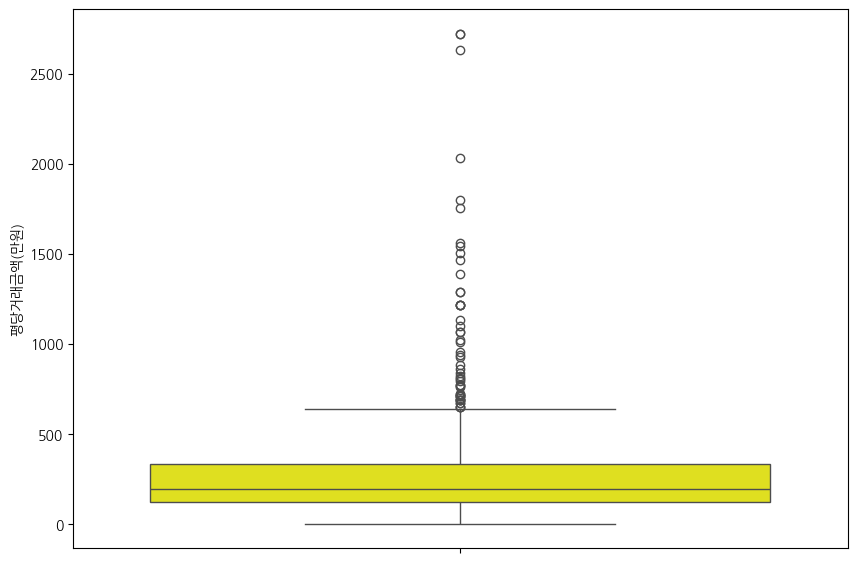

In [22]:
plt.figure(figsize=(10, 7))
plt.xticks(rotation=90)
sns.boxplot(data=df_mgc, y='평당거래금액(만원)', color='yellow')

In [23]:
cd /Users/jade/Desktop/prj/MARKET_ANALYSIS/git

/Users/jade/Desktop/prj/market_analysis/git


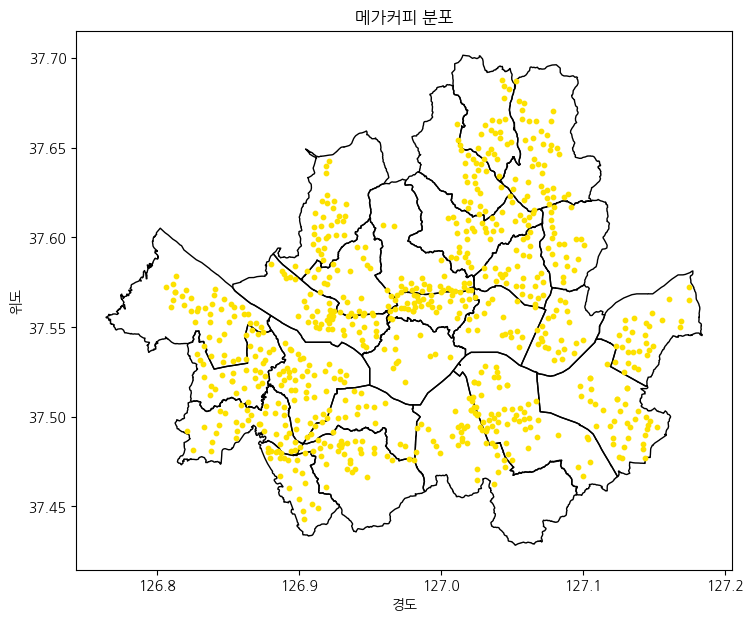

In [29]:
#  위치 
# c: 평당 거래금액(만원)
# s: 인근 가게 수
# current_path = 'Users/jade/Desktop/prj/상권분석/git/market_area_analysis/'
shp_file_path = 'market_area_analysis/shp_files/LARD_ADM_SECT_SGG_11_202502.shp'
# full_path = os.path.join(current_path, shp_file_path)


seoul_boundary = gpd.read_file(shp_file_path) #gpd로 읽고
seoul_boundary = seoul_boundary.to_crs(epsg=4326) #tocrs를 통해 4326으로 변환

fig, ax = plt.subplots(figsize=(10, 7))
seoul_boundary.plot(ax=ax, edgecolor="black", facecolor="none")

plt.scatter(x=df_mgc['경도'], 
            y=df_mgc['위도'], 
            s=10, c='#FDE100')

plt.xlabel('경도')
plt.ylabel('위도')
plt.title('메가커피 분포')
# plt.colorbar(label='평당거래금액(만원)')


# ctx.add_basemap(ax=ax,
#                 crs=seoul_boundary.crs, 
#                 source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

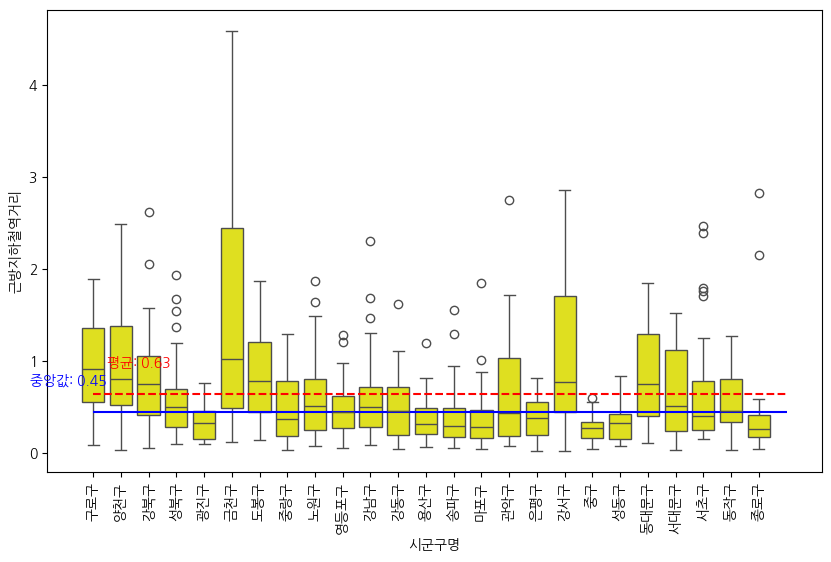

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_mgc, x='시군구명', y='근방지하철역거리', color='yellow')
plt.hlines(df_mgc['근방지하철역거리'].mean(), xmin=0, xmax=df_mgc['시군구명'].nunique(), colors='red', linestyles='--')
plt.text(x=0.5, y=df_mgc['근방지하철역거리'].mean() + 0.3,  s=f'평균: {df_mgc['근방지하철역거리'].mean():.2f}', color='red')

plt.hlines(df_mgc['근방지하철역거리'].median(), xmin=0, xmax=df_mgc['시군구명'].nunique(), colors='blue', linestyles='-')
plt.text(x=0.5, y=df_mgc['근방지하철역거리'].median() + 0.3,  s=f'중앙값: {df_mgc['근방지하철역거리'].median():.2f}', ha='right' , color='blue')
plt.xticks(rotation=90)
plt.show()




In [126]:
df_mgc.to_csv('df_mgc.csv', encoding='utf-8-sig', index=False)

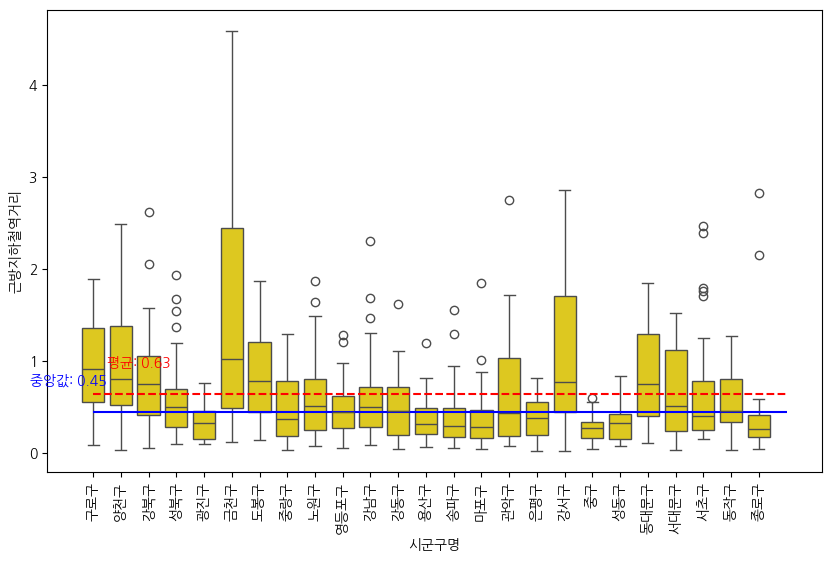

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_mgc, x='시군구명', y='근방지하철역거리', color='#FDE100')
plt.hlines(df_mgc['근방지하철역거리'].mean(), xmin=0, xmax=df_mgc['시군구명'].nunique(), colors='red', linestyles='--')
plt.text(x=0.5, y=df_mgc['근방지하철역거리'].mean() + 0.3,  s=f'평균: {df_mgc['근방지하철역거리'].mean():.2f}', color='red')

plt.hlines(df_mgc['근방지하철역거리'].median(), xmin=0, xmax=df_mgc['시군구명'].nunique(), colors='blue', linestyles='-')
plt.text(x=0.5, y=df_mgc['근방지하철역거리'].median() + 0.3,  s=f'중앙값: {df_mgc['근방지하철역거리'].median():.2f}', ha='right' , color='blue')
plt.xticks(rotation=90)
plt.show()


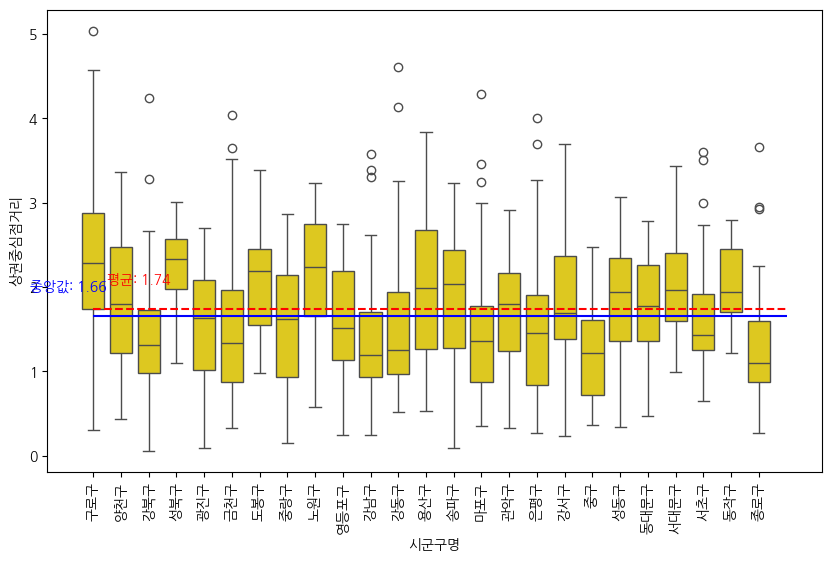

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_mgc, x='시군구명', y='상권중심점거리', color='#FDE100')
plt.hlines(df_mgc['상권중심점거리'].mean(), xmin=0, xmax=df_mgc['시군구명'].nunique(), colors='red', linestyles='--')
plt.text(x=0.5, y=df_mgc['상권중심점거리'].mean() + 0.3,  s=f'평균: {df_mgc['상권중심점거리'].mean():.2f}', color='red')

plt.hlines(df_mgc['상권중심점거리'].median(), xmin=0, xmax=df_mgc['시군구명'].nunique(), colors='blue', linestyles='-')
plt.text(x=0.5, y=df_mgc['상권중심점거리'].median() + 0.3,  s=f'중앙값: {df_mgc['상권중심점거리'].median():.2f}', ha='right' , color='blue')
plt.xticks(rotation=90)
plt.show()


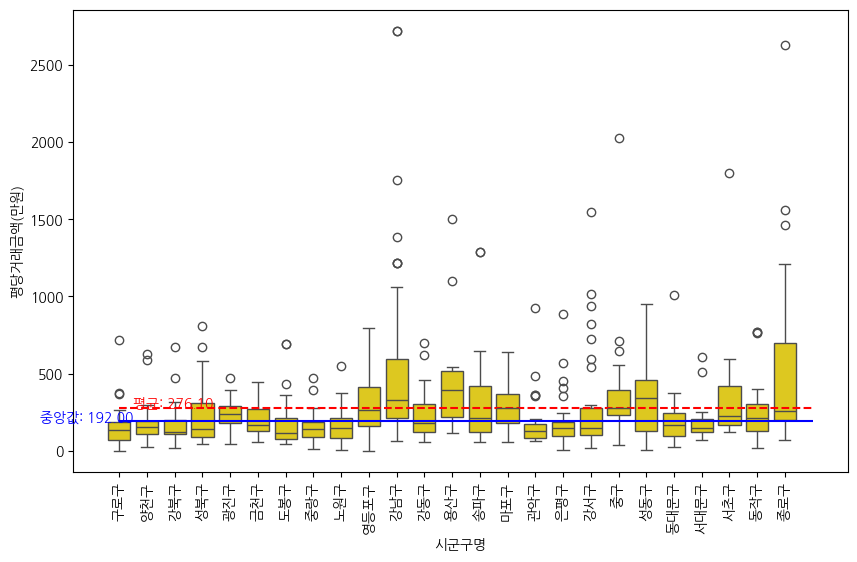

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_mgc, x='시군구명', y='평당거래금액(만원)', color='#FDE100')
plt.hlines(df_mgc['평당거래금액(만원)'].mean(), xmin=0, xmax=df_mgc['시군구명'].nunique(), colors='red', linestyles='--')
plt.text(x=0.5, y=df_mgc['평당거래금액(만원)'].mean() + 0.3,  s=f'평균: {df_mgc['평당거래금액(만원)'].mean():.2f}', color='red')

plt.hlines(df_mgc['평당거래금액(만원)'].median(), xmin=0, xmax=df_mgc['시군구명'].nunique(), colors='blue', linestyles='-')
plt.text(x=0.5, y=df_mgc['평당거래금액(만원)'].median() + 0.3,  s=f'중앙값: {df_mgc['평당거래금액(만원)'].median():.2f}', ha='right' , color='blue')
plt.xticks(rotation=90)
plt.show()